Content:

1. Cleaning and Transforming the Data
2. Univariate Analysis
3. KPI   
	a. What is the average revenue per order?   
	b. What is the monthly sales revenue?   
	c. What category of products had the largest sales volume?   
	d. What items had the largest sales volume?   
	e. What category of products made the most sales revenue?    
	f. What items made the most and the least sales revenue?    
	g. What is the average monthly growth rate?     
	h. What are the top 10 states by sales?     
	i. What is the number of monthly active customers?      
    j. How many of these customers are new, how many are returning customers?What is the new customers growth rate?

1. Cleaning and Transforming the Data

In [116]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#datetime
import datetime as dt

#file directoryy
import os
import glob


In [117]:
files = [file for file in os.listdir(r"C:\Users\rayan\OneDrive\Documents\Sales_2019")]

for each_file in files:
    print(each_file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [118]:
 
df = pd.DataFrame() 

#concatenating the files 
for each_file in files:
    sales_data = pd.read_csv(f"C:\\Users\\rayan\\OneDrive\\Documents\\Sales_2019//{each_file}")
    df = pd.concat([df, sales_data])


In [119]:
#glimpse of data
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [120]:
#checking for empty cells 
total_null = df.isnull().sum().sort_values(ascending = False)
total_null

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [121]:
#the empty cells are consistent accross all columns, we can delete those entire rows. 
df.shape 

(186850, 6)

In [122]:
#After dropping 545 row, there should be 186850-545 = 186305 rows
#dropping the empty rows
df = df.dropna() 
df.shape

(186305, 6)

In [123]:
df.dtypes #checking for inconsistent data types

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [124]:
#Quantity Ordered should not be objects but integers. 
#turning Quantity ordered into numbers.
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'], errors='coerce')  
#empty cells prevent us from turning them into integers. Dropping empty cells.
df.dropna(subset = ['Quantity Ordered'], inplace = True) 
#Turning the values into integers. 
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'], downcast='integer')

# Prices should not be objects but floats
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast ='float')
#Rounding the prices to 2 decimal places as it appeared some values had more. 
df['Price Each'] = df['Price Each'].apply(lambda x:round(x,2))

#Order date should be a date.
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [125]:
df.dtypes #checking the changes.

Order ID                    object
Product                     object
Quantity Ordered              int8
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [126]:
#setting Order ID as our index
df = df.set_index('Order ID')

In [127]:
#Create a new column for months  

Month = df['Order Date'].dt.strftime('%b')
df.insert(5, 'Month', Month)

In [128]:
#Ordering the table by Month
#df = df.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)

In [129]:
#Split the street, city and State into their own columns. 
df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(',', expand=True)
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Street,City,State
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,917 1st St,Dallas,TX 75001
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,682 Chestnut St,Boston,MA 02215
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,669 Spruce St,Los Angeles,CA 90001
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,669 Spruce St,Los Angeles,CA 90001
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,333 8th St,Los Angeles,CA 90001


In [130]:
#drop zip code(irrelevant). First, split State and zip
df[['State', 'Zip']] =df['State'].str.split(expand=True)

#then drop Zip
del df['Zip']

#We will keep the original'Purchase Address' column because it is unique and allows us to identify each customer.
#We will drop the street. 
del df['Street']
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State
Order ID,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,Dallas,TX
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,Boston,MA
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles,CA
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,Los Angeles,CA
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,Los Angeles,CA


In [131]:
#Create product categories to better visualize our sales
categories = {'Laptops': ['Macbook Pro Laptop','ThinkPad Laptop',], 'Monitors': ['27in 4K Gaming Monitor ','34in Ultrawide Monitor', 'Flatscreen TV', '27in FHD Monitor', '20in Monitor'], 'Phones': ['iPhone','Google Phone', 'Vareebadd Phone'], 'Headphones': ['Apple Airpods Headphones','Bose SoundSport Headphones', 'Wired Headphones'], 'Appliances': ['LG Washing Machine', 'LG Dryer'], 'Other Electronics': ['Lightning Charging Cable', 'USB-C Charging Cable', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)']}

#Create Category column
df['Category'] = df['Product'].map({i: k for k, v in categories.items() for i in v})

#Adding a Revenue column
df['Revenue']=df['Price Each']*df['Quantity Ordered']

#Rounding up the Revenue column to 2 decimal places. Otherwise returns an exponential notation.  
df['Revenue'] = df['Revenue'].apply(lambda x:round(x,2))
df. columns. values

array(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'State', 'Category',
       'Revenue'], dtype=object)

In [132]:
df.columns.values

array(['Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'State', 'Category',
       'Revenue'], dtype=object)

In [133]:
#reordering the columns 
df = df[[
 'Category',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Revenue',
 'Order Date',
 'Month',
 'Purchase Address',
 'City',
 'State']]
df.head()

,Category,Product,Quantity Ordered,Price Each,Revenue,Order Date,Month,Purchase Address,City,State
Order ID,,,,,,,,,,
176558,Other Electronics,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,Apr,"917 1st St, Dallas, TX 75001",Dallas,TX
176559,Headphones,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,Apr,"682 Chestnut St, Boston, MA 02215",Boston,MA
176560,Phones,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
176560,Headphones,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
176561,Headphones,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,Apr,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA


In [134]:
#dropping duplicate rows
df.drop_duplicates()

,Category,Product,Quantity Ordered,Price Each,Revenue,Order Date,Month,Purchase Address,City,State
Order ID,,,,,,,,,,
176558,Other Electronics,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,Apr,"917 1st St, Dallas, TX 75001",Dallas,TX
176559,Headphones,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,Apr,"682 Chestnut St, Boston, MA 02215",Boston,MA
176560,Phones,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
176560,Headphones,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
176561,Headphones,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,Apr,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
259353,Other Electronics,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,Sep,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA
259354,Phones,iPhone,1,700.00,700.00,2019-09-01 16:00:00,Sep,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA
259355,Phones,iPhone,1,700.00,700.00,2019-09-23 07:39:00,Sep,"220 12th St, San Francisco, CA 94016",San Francisco,CA


In [135]:
#Adding a column to determine whether a customer is new or reoccuring, using Purchase Address.
df = df.assign(Customer=np.where(~df['Purchase Address'].duplicated(),'New','Existing'))
df.head()

,Category,Product,Quantity Ordered,Price Each,Revenue,Order Date,Month,Purchase Address,City,State,Customer
Order ID,,,,,,,,,,,
176558,Other Electronics,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,Apr,"917 1st St, Dallas, TX 75001",Dallas,TX,New
176559,Headphones,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,Apr,"682 Chestnut St, Boston, MA 02215",Boston,MA,New
176560,Phones,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,New
176560,Headphones,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,Existing
176561,Headphones,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,Apr,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,New


In [136]:
 #Saving the cleaned data frame into a csv.
df.to_csv('Sales_data_2019')

EXPLORING THE DATA 

2. Univariate Analysis


In [144]:
df.describe()

,Quantity Ordered,Price Each,Revenue
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917
std,0.442793,332.731330,332.919771
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


There is a significant gap between the median revenue and the 75th percentile of revenues. While 25% of sales bring in more than USD 150 in revenue, half of the sales bring in less than USD 14.95.

How do customers order?

Most order quantities are closer to 1 item. With a standard deviation of 0.44 and a max order of 9 units. We can infer that items are not bought in bulk. 

What is the average order quantity per category?

In [145]:
Qty_by_Category = df.groupby('Category')['Quantity Ordered'].mean().sort_values(ascending=False)
Qty_by_Category

Category
Other Electronics    1.248470
Headphones           1.040183
Monitors             1.004781
Phones               1.001178
Laptops              1.000678
Appliances           1.000000
Name: Quantity Ordered, dtype: float64

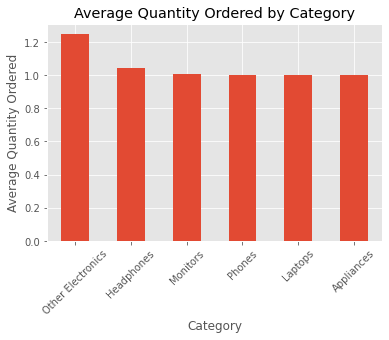

In [146]:
Qty_by_Category.plot(kind='bar')
plt.title('Average Quantity Ordered by Category')
plt.ylabel('Average Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

3. KPI ANALYSIS

a. What is the average revenue per order?

In [158]:
#What is the average revenue per order? 
rev_per_order = df.groupby('Order ID')['Revenue'].sum()
rev_per_order.mean()


193.30091836334392

The average revenue per order is $193.30.

b. What is the monthly sales revenue?

In [148]:
#First, ordering the months into the regular calendar order
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
df.sort_values(by='Month',inplace=True) 

#Calculating the monthly sales revenue
Monthly = df.groupby('Month')['Revenue'].sum()
Monthly

Month
Jan    1822256.73
Feb    2202022.42
Mar    2807100.38
Apr    3390670.24
May    3152606.75
Jun    2577802.26
Jul    2647775.76
Aug    2244467.88
Sep    2097560.13
Oct    3736726.88
Nov    3199603.20
Dec    4613443.34
Name: Revenue, dtype: float64

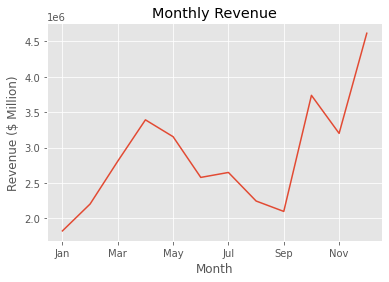

In [149]:
#Visualizing 

#Plotting monthly sales
Monthly.plot()
plt.xlabel('Month')
plt.ylabel('Revenue ($ Million)')
plt.title('Monthly Revenue')
plt.show()

December had the highest sales revenues at USD 4.6M. January had the lowest at USD 1.8.

c. What category of products had the largest sales volume?

In [137]:
#Calculating the sales volume for each category of product
Sales_vol_by_cat = df.groupby('Category')['Quantity Ordered'].sum().sort_values(ascending=False)
Sales_vol_by_cat



Category
Other Electronics    105844.0
Headphones            49675.0
Monitors              22697.0
Phones                14449.0
Laptops                8858.0
Appliances             1312.0
Name: Quantity Ordered, dtype: float64

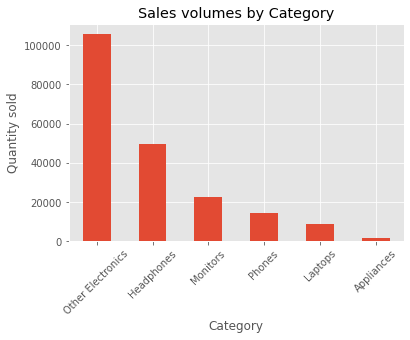

In [138]:
#visualizing the sales volume by category
Sales_vol_by_cat.plot(kind='bar')
plt.title('Sales volumes by Category')
plt.ylabel('Quantity sold')
plt.xticks(rotation=45)
plt.show()

The other electronics and headphones categories represented the largest sales volumes.

d. What specific products had the largest sales volume?

In [139]:
Sales_volume = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
Sales_volume

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity Ordered, dtype: float64

4-pack batteries and USB-C charging cables had the largest sales volumes. 


e. What category of products made the most sales revenue?

In [140]:
#Calculating for total sales revenue by category
Sales_by_cat=df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
Sales_by_cat

Category
Laptops              12167558.70
Phones                8940700.00
Monitors              5387831.22
Headphones            3941193.86
Other Electronics      832454.63
Appliances             787200.00
Name: Revenue, dtype: float64

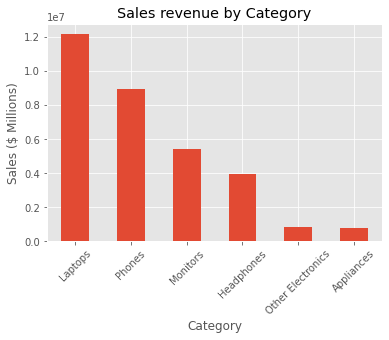

In [141]:
Sales_by_cat.plot(kind='bar')
plt.title('Sales revenue by Category')
plt.ylabel('Sales ($ Millions)')
plt.xticks(rotation=45)
plt.show()

Laptops account for the largest sales revenue by far, followed by phones and monitors. Appliances and Other Electronics (including batteries and chargers) make up the lowest sales revenue.

f. What items made the most and the least sales revenue?

In [142]:
#Calculating for total revenue by item
Sales_by_item=df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
Sales_by_item


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Revenue, dtype: float64

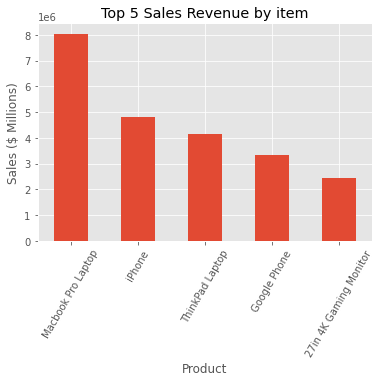

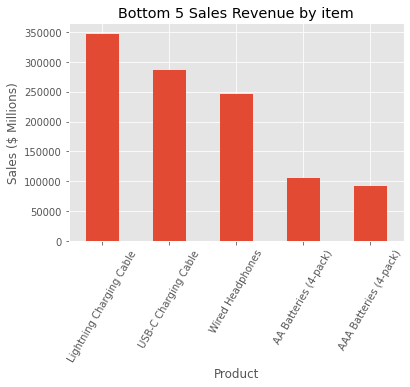

In [143]:
Sales_by_item[:5].plot(kind='bar')
plt.title('Top 5 Sales Revenue by item')
plt.ylabel('Sales ($ Millions)')
plt.xticks(rotation=60)
plt.show()

Sales_by_item[-5:].plot(kind='bar')
plt.title('Bottom 5 Sales Revenue by item')
plt.ylabel('Sales ($ Millions)')
plt.xticks(rotation=60)
plt.show()

Macbook Pros account for the largest sales revenue by far, followed by iPhones and Thinkpad Laptops. 4-pack batteries and Wired headphones make the least sales revenue. 

g. What is the average monthly growth rate?

In [150]:
Growth_rate = Monthly.pct_change()
Growth_rate

Month
Jan         NaN
Feb    0.208404
Mar    0.274783
Apr    0.207891
May   -0.070211
Jun   -0.182327
Jul    0.027145
Aug   -0.152320
Sep   -0.065453
Oct    0.781464
Nov   -0.143742
Dec    0.441880
Name: Revenue, dtype: float64

In [151]:
Growth_rate.mean()

0.12068299362217756

The average monthly growth rate is 12.06%.
 
h. What are the top 10 states by sales?

In [152]:
top_states = df.groupby(['State'])['Revenue'].sum().sort_values(ascending=False)

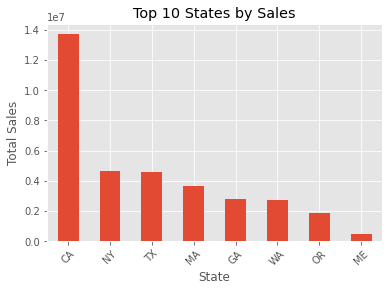

In [153]:

top_states.plot(kind = 'bar')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

California accounted for the largest sales by far with more than $1.3M in 2019. 

i. What is the number of monthly active customers? 

In [154]:
#Because we do not have customer IDs or names, we can only identify each unique customer thanks to their full address. 
active_customers = df.groupby(['Month'])[['Purchase Address']].nunique()
active_customers

,Purchase Address
Month,
Jan,9185
Feb,11304
Mar,14245
Apr,17112
May,15471
Jun,12720
Jul,13473
Aug,11300
Sep,11025


j. How many of these customers are new, how many are returning customers? What is the new customers growth rate?

In [155]:
new_customers = df.groupby(['Month'])['Customer'].value_counts()

Text(0, 0.5, 'customers')

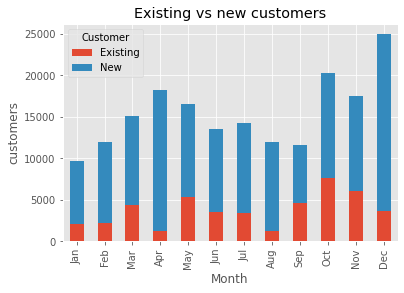

In [156]:
#Visualizing new and existing customers
new_customers = new_customers.unstack('Customer')
n_c_plot = new_customers.columns.tolist()
new_customers[n_c_plot].plot(kind='bar', stacked=True)
plt.title('Existing vs new customers')
plt.ylabel('customers')

In [157]:
#Calculating the monthly new customers growth rate
new_customers.pct_change()


Customer,Existing,New
Month,,
Jan,NaN,NaN
Feb,0.076773,0.275183
Mar,0.956403,0.109690
Apr,-0.727716,0.577317
May,3.500426,-0.340173
Jun,-0.323357,-0.115620
Jul,-0.044793,0.090062
Aug,-0.641266,-0.013234
Sep,2.775327,-0.348049


December saw the largest influx of new customers, which may have followed a marketing campaign and other seasonal market factors. September had the lowest amount of new customers. 